In [376]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Load IRIS datasets and check keys

In [377]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Get the data and check its shape

In [378]:
X = data.data
X.shape

(150, 4)

### There are 150 data samples, each with 4 features

In [379]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Use PCA for dimension reduciton so we can reduce it to 2 features

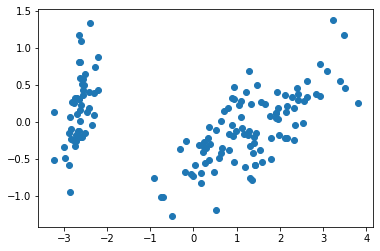

In [380]:
pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)
plt.scatter(X2[:,0],X2[:,1])
plt.show()

### To verify that we still have 150 samples, and 2 features instead of 4

In [381]:
X2.shape

(150, 2)

### The pca.components_ is of shape (n_components, n_features_input)

In [382]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### With the n_components information, we can apply the transform using matrix multiplication.

    Remember that input dataset has shape (150,4)
    After transform, the dataset has shape (150,2)
    so we need to use input to multiple a matrix of (4,2), which is the transpose of pca.components_

In [383]:
X3 = np.matmul(X,pca.components_.T) 

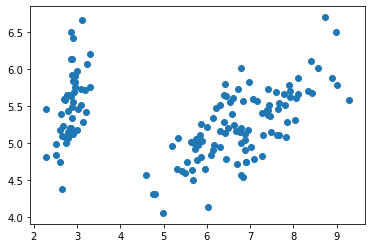

In [384]:
plt.scatter(X3[:,0],X3[:,1])
plt.show()

### From the scatter plot, the output directly from pca transform is the same as using matrix multiplication, the difference is there is a shift

In [385]:
np.mean(X3,axis = 0)

array([5.50236513, 5.32695258])

In [400]:
X3[:5,:] - X2[:5,:]

array([[5.50236513, 5.32695258],
       [5.50236513, 5.32695258],
       [5.50236513, 5.32695258],
       [5.50236513, 5.32695258],
       [5.50236513, 5.32695258]])

## As it can be seen, PCA transform subtracted the mean for each feature after the transformation

In [387]:
pca.explained_variance_

array([4.22824171, 0.24267075])

## Next, Let's use n_components = 4  to see how the results look like

In [388]:
pca4 = PCA(n_components = 4)
X4 = pca4.fit_transform(X)

In [389]:
pca4.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

###    First using all 4 components, the first 2 component is the same as using 2 components, as it should be

## Remember that the components is of shape (n_output_feature, n_input_feature)

### Let's check the covariance matrix for original data (before PCA transformation)

In [390]:
cov_mat = np.cov(X.T)
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

### Calculate the total variance for all the features (sum along the diagnoal line)

In [391]:
s = 0
for i in range(4):
    s += cov_mat[i][i]
s

4.572957046979867

In [392]:
pca4.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [393]:
np.sum(pca4.explained_variance_)

4.572957046979869

In [394]:
pca4.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [395]:
np.sum(pca4.explained_variance_ratio_)

1.0

In [396]:
cov_mat2 = np.cov(X4.T)
cov_mat2

array([[ 4.22824171e+00, -7.33939382e-17,  6.78055673e-17,
         1.22944160e-17],
       [-7.33939382e-17,  2.42670748e-01,  1.19218580e-17,
         9.40709106e-18],
       [ 6.78055673e-17,  1.19218580e-17,  7.82095000e-02,
         8.28941688e-18],
       [ 1.22944160e-17,  9.40709106e-18,  8.28941688e-18,
         2.38350930e-02]])

## Clearly after PCA transformation, the covariance matrix has non-zero values only along the diagnoal axis

# In summary, the PCA works in following procedure:
    1) Calculate the covariance matrix of the input dataset (input data shape is n_sample, n_feature, covariance shape is n_feature, n_feature assuming n_sample > n_feature)

    2) Find the eigenvalue and eigenvectors of the covariance matrix, sort by eigenvalues in decreasing order

    3) Take only first n_components of the eigenvalues and eigenvectors. The components_ of PCA is of shape (n_components, n_feature)

    4) Apply input_data * components_.T (matrix multiplication, input data is n_sample, n_feature, components_ is n_components, n_feature), the output is of shape (n_sample, n_components)

    5) The explained variance is the eigenvalue of the input covariance matrix. We sorted it by descending order, so the first component has largest explained variance. The sum of exaplained variance is the sum of diagnoal elements of input covariance matrix

In [397]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)


In [398]:
eig_vals

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [399]:
eig_vecs

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])